In [1]:
import sys, os
sys.path.insert(0, os.path.abspath('../../'))
from motors.simulation import Simulation
from motors.plot import *
prepare_plot()

import matplotlib as mpl
%reload_ext autoreload
%autoreload 2
%matplotlib inline
mpl.rc('text', usetex=True)

# Sample data

In [2]:
this = Simulation(data_source = 'adk_md_data')
this.name = 'chi2THR175'
this.simulate()

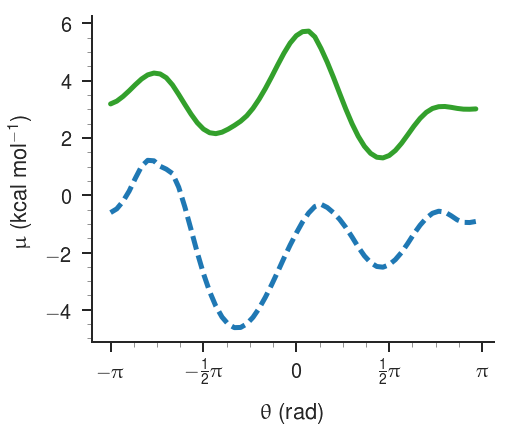

In [3]:
plot_energy(this)

# Make something smaller and more manageable...

In [61]:
import scipy as sc
unbound = sc.interpolate.interp1d(range(this.bins), this.unbound)
bound   = sc.interpolate.interp1d(range(this.bins), this.bound)

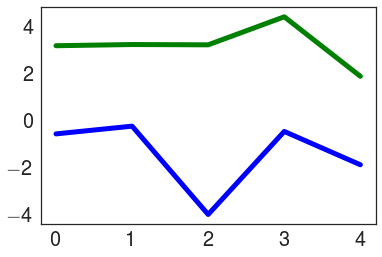

In [62]:
bins = 5
plt.plot(range(bins), [unbound((this.bins -1) * i/bins) for i in range(bins)], c='g')
plt.plot(range(bins), [bound((this.bins -1) * i/bins) for i in range(bins)], c='b')

In [65]:
this = Simulation(data_source = 'manual')
this.unbound = [unbound((60 -1) * i/bins) for i in range(bins)]
this.bound   = [bound((60 -1) * i/bins) for i in range(bins)]
this.C_intersurface = 10.0 ** 6  # per mole per second
this.offset_factor = 5.7  # kcal per mol
this.catalytic_rate = 312.0  # per second
this.cSubstrate = 2.5 * 10 ** -6
this.simulate(user_energies=True)

In [66]:
from matplotlib.ticker import MultipleLocator
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.gridspec import GridSpec, GridSpecFromSubplotSpec
from matplotlib.ticker import FormatStrFormatter
def plot_transition_matrix(matrix, title=None, name=None, source_code=None, text=None):

    # Plot the FULL transition matrix
    f, (ax1) = plt.subplots(1, figsize=(8,8), facecolor='white')
    cmap = mpl.cm.jet
    masked = np.copy(matrix)
    masked[masked == 0.0] = np.nan
    im3 = ax1.imshow(masked, interpolation='none', cmap=cmap, alpha=0.3, vmin=0, vmax=1)
    divider3 = make_axes_locatable(ax1)
    cax3 = divider3.append_axes("right", size="10%", pad=0.05)
    cbar3 = plt.colorbar(im3, cax=cax3, ticks=MultipleLocator(0.2), format="%.2f")

    if text:
        for x_val in range(len(masked[0])):
            for y_val in range(len(masked[1])):
                # Because flippin' imshow, man.
                c = '{:.3f}'.format(masked[y_val][x_val]) if not np.isnan(masked[x_val][y_val]) else ''
                ax1.text(x_val, y_val, c, va='center', ha='center', fontsize=10)

    ax1.grid(None)
    ax1.set_ylabel('From bin in rows')
    ax1.set_xlabel('To bin in columns')
    if title:
        ax1.set_title(title, size=20, y=1.0)

    plt.tight_layout()
    plt.show()

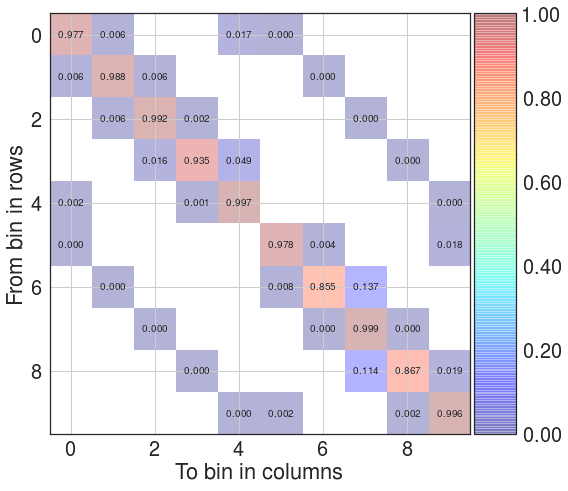

In [73]:
plot_transition_matrix(this.tm, text=True)

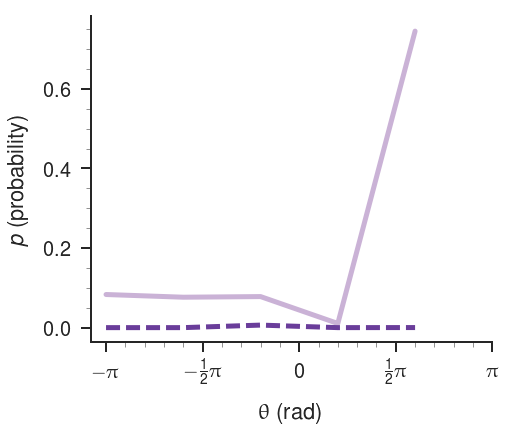

In [75]:
plot_ss(this)

C                         +1.00e+06  second**-1
D                         +3.00e+12  degrees**2 second**-1
k_{cat}                   +3.12e+02  second**-1
[S]                       +2.50e-06  M         
dt                        +1.00e-11  second    
-------------------------
Intrasurface flux         -6.55e-01  cycle second**-1
Peak                      +6.71e-01  cycle second**-1


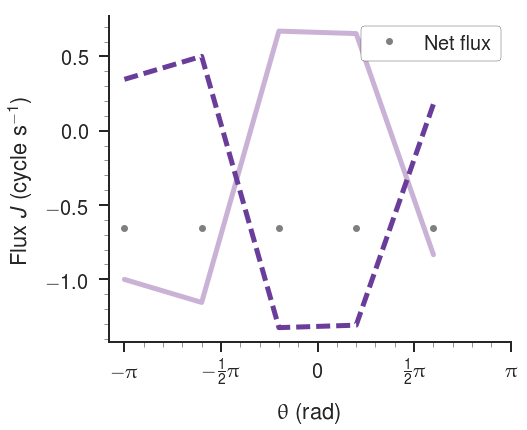

In [71]:
plot_flux(this)

# Add a blockade

In [68]:
blocked = Simulation(data_source = 'manual')
blocked.unbound = [unbound((60 -1) * i/bins) for i in range(bins)]
blocked.bound   = [bound((60 -1) * i/bins) for i in range(bins)]
blocked.C_intersurface = 10.0 ** 6  # per mole per second
blocked.offset_factor = 5.7  # kcal per mol
blocked.catalytic_rate = 312.0  # per second
blocked.cSubstrate = 2.5 * 10 ** -6

blocked.barrier = True
blocked.barrier_bin = 0

blocked.simulate(user_energies=True)

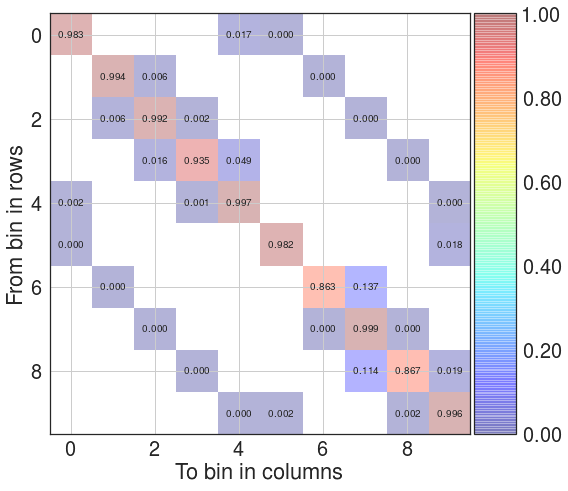

In [76]:
plot_transition_matrix(blocked.tm, text=True)

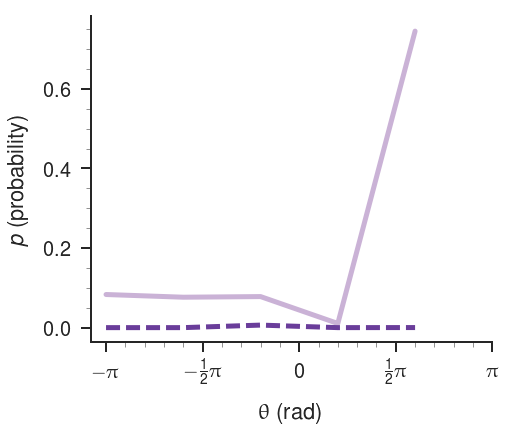

In [77]:
plot_ss(blocked)

C                         +1.00e+06  second**-1
D                         +3.00e+12  degrees**2 second**-1
k_{cat}                   +3.12e+02  second**-1
[S]                       +2.50e-06  M         
dt                        +1.00e-11  second    
-------------------------
Intrasurface flux         -6.58e-06  cycle second**-1
Peak                      +1.67e+00  cycle second**-1


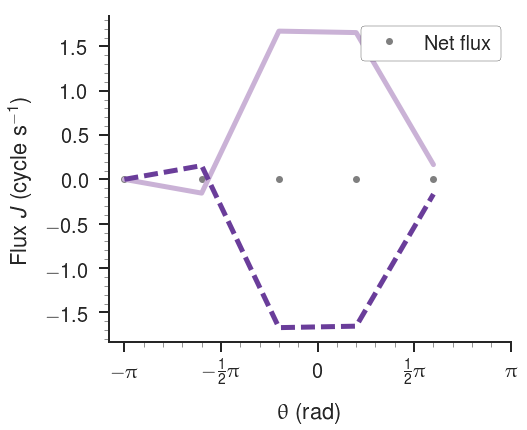

In [72]:
plot_flux(blocked)

Does adding a barrier increase the reciprocating probability flux? Hmm.

In [32]:
this.ss[-1]

2.209972507186874e-06

In [27]:
this.ss[0]

0.0049021119454631407

In [33]:
this.ss[1]

0.0041759063917883067

In [34]:
blocked.ss[-1]

2.210097647275377e-06

In [30]:
blocked.ss[0]

0.0049021092125269127

In [31]:
blocked.ss[1]

0.0041759092631112353

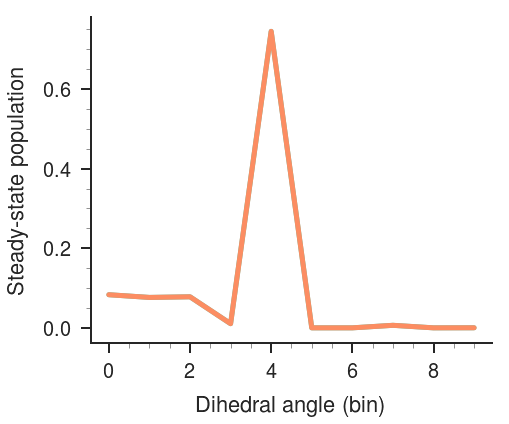

In [78]:
fig = plt.figure(figsize=(6 * 1.2, 6))
grid = GridSpec(1, 1, wspace=0.4, hspace=0.2)
ax1 = plt.subplot(grid[0, 0])
c = sns.color_palette("Set2", n_colors=8)

ax1.plot(this.ss, color=c[0])
ax1.plot(blocked.ss, color=c[1])

ax1.set_xlabel('Dihedral angle (bin)')
ax1.set_ylabel('Steady-state population')
paper_plot(fig)

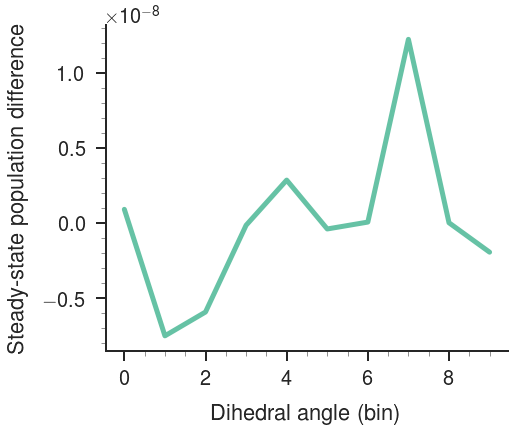

In [79]:
fig = plt.figure(figsize=(6 * 1.2, 6))
grid = GridSpec(1, 1, wspace=0.4, hspace=0.2)
ax1 = plt.subplot(grid[0, 0])
c = sns.color_palette("Set2", n_colors=8)

ax1.plot(this.ss - blocked.ss, color=c[0])

ax1.set_xlabel('Dihedral angle (bin)')
ax1.set_ylabel('Steady-state population difference')
paper_plot(fig)

In [80]:
this.ss - blocked.ss

array([  8.96580254e-10,  -7.54472540e-09,  -5.95449064e-09,
        -1.65067985e-10,   2.84892621e-09,  -4.11870192e-10,
         4.69937859e-11,   1.22426447e-08,   1.32488401e-12,
        -1.96031565e-09])

In [81]:
this.tm[0] - blocked.tm[0]

array([-0.00554579,  0.00554579,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ])

In [82]:
this.tm - blocked.tm

array([[-0.00554579,  0.00554579,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.00603878, -0.00603878,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        -0.00438662,  0.00438662,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.00763454, -0.00763454,  0.        

# Try with a sawtooth

In [5]:
from motors.models import *

In [6]:
this = Simulation(data_source = 'manual')
this.unbound = [saw(i, 50) for i in range(50)]
this.bound   = [saw(i + 25, 50) for i in range(50)]
this.C_intersurface = 10.0 ** 6  # per mole per second
this.offset_factor = 0  # kcal per mol
this.catalytic_rate = 312.0  # per second
this.cSubstrate = 10**0
this.simulate(user_energies=True)

In [39]:
blocked = Simulation(data_source = 'manual')
blocked.unbound = [saw(i, 50) for i in range(50)]
blocked.bound   = [saw(i + 25, 50) for i in range(50)]
blocked.C_intersurface = 10.0 ** 6  # per mole per second
blocked.offset_factor = 0  # kcal per mol
blocked.catalytic_rate = 312.0  # per second
blocked.cSubstrate = 10**0

blocked.barrier = True
blocked.barrier_bin = 26

blocked.simulate(user_energies=True)

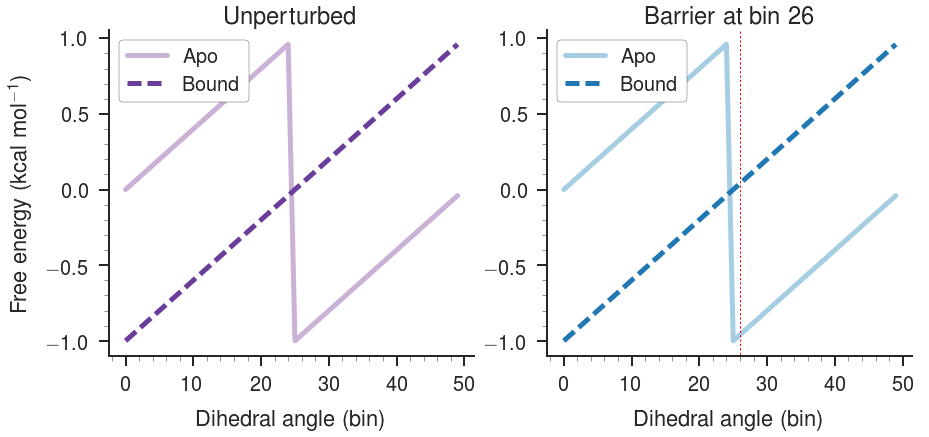

In [42]:
cmap = sns.color_palette("Paired", 10)
fig = plt.figure(figsize=(2 * 6 * 1.2, 6))
grid = GridSpec(1, 2, wspace=0.2, hspace=0.2)
ax1 = plt.subplot(grid[0, 0])

ax1.plot(this.unbound, color=this.unbound_clr, label='Apo')
ax1.plot(this.bound, color=this.bound_clr, ls='--', label='Bound')

ax1.set_xlabel('Dihedral angle (bin)')
ax1.set_ylabel('Free energy (kcal mol$^{-1}$)')
ax1.legend(frameon=True, loc=0, framealpha=1.0, edgecolor='k')
ax1.set_title('Unperturbed')

ax2 = plt.subplot(grid[0, 1])

ax2.plot(blocked.unbound, color=cmap[0], label='Apo')
ax2.plot(blocked.bound, color=cmap[1], ls='--', label='Bound')

ax2.set_xlabel('Dihedral angle (bin)')
ax2.legend(frameon=True, loc=0, framealpha=1.0, edgecolor='k')
ax2.axvline(26, -1, 1, c='r', ls=':', lw=1)

ax2.set_title('Barrier at bin 26')
paper_plot(fig)

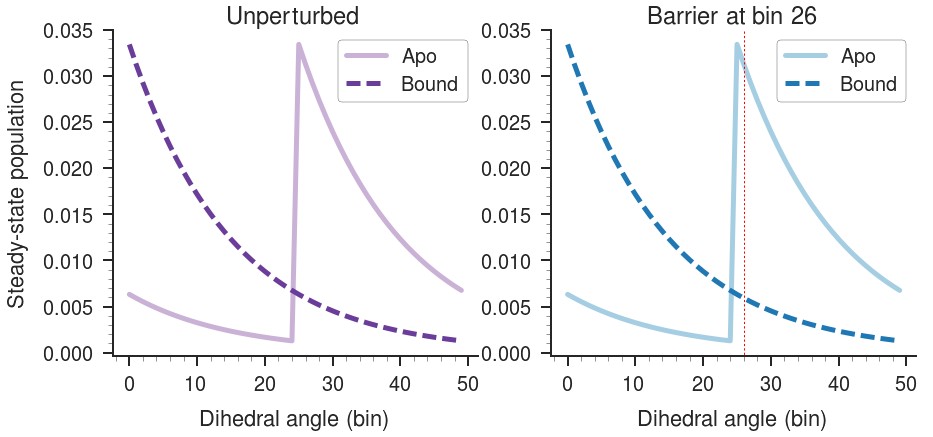

In [43]:
cmap = sns.color_palette("Paired", 10)
fig = plt.figure(figsize=(2 * 6 * 1.2, 6))
grid = GridSpec(1, 2, wspace=0.2, hspace=0.2)
ax1 = plt.subplot(grid[0, 0])

ax1.plot(this.ss[0:this.bins], color=this.unbound_clr, label='Apo')
ax1.plot(this.ss[this.bins:2*this.bins], color=this.bound_clr, ls='--', label='Bound')

ax1.set_xlabel('Dihedral angle (bin)')
ax1.set_ylabel('Steady-state population')
ax1.legend(frameon=True, loc=0, framealpha=1.0, edgecolor='k')
ax1.set_title('Unperturbed')

ax2 = plt.subplot(grid[0, 1])

ax2.plot(blocked.ss[0:this.bins], color=cmap[0], label='Apo')
ax2.plot(blocked.ss[this.bins:2*this.bins], color=cmap[1], ls='--', label='Bound')

ax2.set_xlabel('Dihedral angle (bin)')
ax2.legend(frameon=True, loc=0, framealpha=1.0, edgecolor='k')
ax2.axvline(26, -1, 1, c='r', ls=':', lw=1)
ax2.set_title('Barrier at bin 26')
paper_plot(fig)

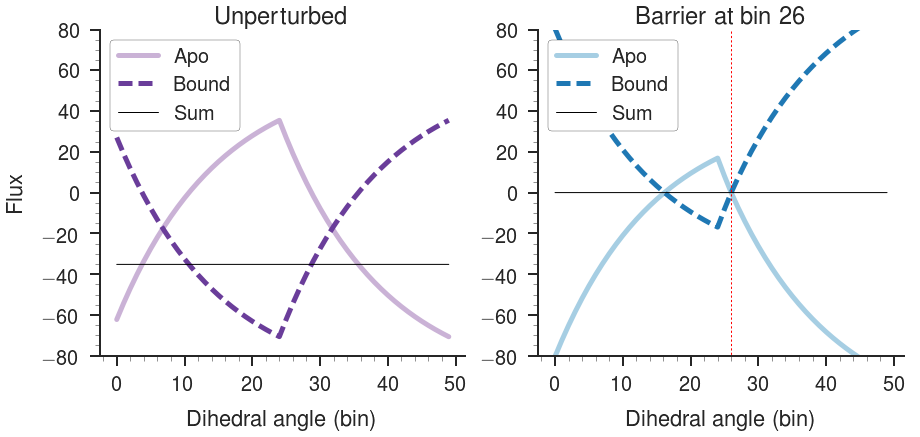

In [62]:
cmap = sns.color_palette("Paired", 10)
fig = plt.figure(figsize=(2 * 6 * 1.2, 6))
grid = GridSpec(1, 2, wspace=0.2, hspace=0.2)
ax1 = plt.subplot(grid[0, 0])

ax1.plot(this.flux_u, color=this.unbound_clr, label='Apo')
ax1.plot(this.flux_b, color=this.bound_clr, ls='--', label='Bound')
ax1.plot(this.flux_u + this.flux_b, color='k', lw=1, label='Sum')

ax1.set_xlabel('Dihedral angle (bin)')
ax1.set_ylabel('Flux')
ax1.legend(frameon=True, loc=2, framealpha=1.0, edgecolor='k')
ax1.set_title('Unperturbed')
ax1.set_ylim([-80, 80])

ax2 = plt.subplot(grid[0, 1])
ax2.plot(blocked.flux_u, color=cmap[0], label='Apo')
ax2.plot(blocked.flux_b, color=cmap[1], ls='--', label='Bound')
ax2.plot(blocked.flux_u + blocked.flux_b, color='k', lw=1, label='Sum')
ax2.set_ylim([-80, 80])


ax2.set_xlabel('Dihedral angle (bin)')
ax2.legend(frameon=True, loc=2, framealpha=1.0, edgecolor='k')
ax2.axvline(26, -1, 1, c='r', ls=':', lw=1)
ax2.set_title('Barrier at bin 26')
paper_plot(fig)

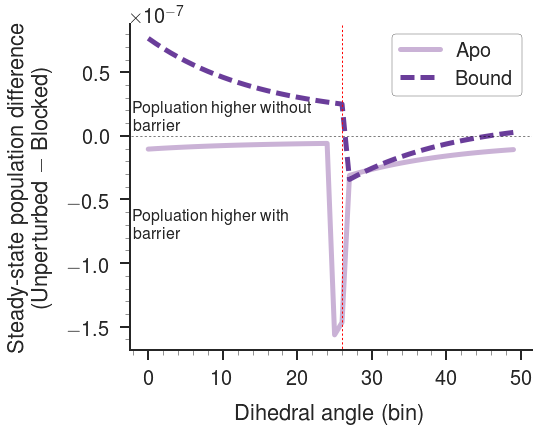

In [54]:
cmap = sns.color_palette("Paired", 10)
fig = plt.figure(figsize=(1 * 6 * 1.2, 6))
grid = GridSpec(1, 1, wspace=0.2, hspace=0.2)
ax1 = plt.subplot(grid[0, 0])

ax1.plot(this.ss[0:this.bins] - blocked.ss[0:this.bins], color=this.unbound_clr, label='Apo')
ax1.plot(this.ss[this.bins:2*this.bins] - blocked.ss[this.bins:2*this.bins],
         color=this.bound_clr, ls='--', label='Bound')

ax1.set_xlabel('Dihedral angle (bin)')
ax1.set_ylabel('Steady-state population difference\n(Unperturbed $-$ Blocked)')
ax1.legend(frameon=True, loc=0, framealpha=1.0, edgecolor='k')

ax1.axhline(0, -10, 100, c='k', ls=':', lw=0.5)
ax1.annotate('Popluation higher without \nbarrier', xy=(-2, 0.05*10**-7), xycoords='data', fontsize=16)
ax1.annotate('Popluation higher with \nbarrier', xy=(-2, -0.8*10**-7), xycoords='data', fontsize=16)
ax1.axvline(26, -1, 1, c='r', ls=':', lw=1)

paper_plot(fig)

In [64]:
this.ss[25] - this.ss[24]

0.032169291729846658